# The Big Notebook of Data Exploration Examples

*Updated 2021-01-22 by [Michael Burkhardt](mailto:burkhardt.5@osu.edu)*

Examples in this notebook are from chapter 3 (“Exploring Data”) of
_Introduction to Data Mining_ (1st ed.) by Tan, et al. This chapter has
been omitted from the second edition, but you can download it for free
[here](https://www-users.cs.umn.edu/~kumar001/dmbook/data_exploration_1st_edition.pdf).

<a name="contents"></a>
### Contents

#### Textbook Examples

* [3.1 - Frequency table](#ex301) $\star$
* [3.2 - Percentiles](#ex302)
* [3.3 - Trimmed mean](#ex303)
* [3.4 - Using the `agg()` function](#ex304) $\star$
* [3.5 - The importance of data order](#ex305)
* [3.6 - Visualizing graph data](#ex306)
* [3.7 - Stem and leaf plot](#ex307)
* [3.8 - Histograms](#ex308) $\star$
* [3.9 - 3D histogram](#ex309)
* [3.10 - Box plot](#ex310) $\star$
* [3.11 - Pie chart](#ex311)
* [3.12 - Cumulative distribution function](#ex312) $\star$
* [3.13 - Scatter plot matrix](#ex313) $\star$
* [3.14 - 3D scatter plot](#ex314)
* [3.15 - Contour plot](#ex315)
* [3.16 - Surface plot](#ex316) (unimplemented)
* [3.17 - Vector plot](#ex317) (unimplemented)
* [3.18 - Contour plot of slices](#ex318) (unimplemented)
* [3.19 - Standardized data matrix](#ex319)
* [3.20 - Correlation matrix](#ex320) $\star$
* [3.21 - Parallel coordinates plot](#ex321) $\star$
* [3.22 - Star graphs and Chernoff faces](#ex322) (unimplemented)


#### Other Examples (not in book)

* [Kernel density plot](#kdplot) $\star$
* [Pareto chart](#pareto)

#### Seaborn Examples

* [Histograms and KDE plots](#sbhist)
* [Pareto histogram](#sbphist)
* [Box plots](#sbbox)
* [Violin plot](#sbviolin) $\star$
* [Scatter plot](#sbscatter)
* [Scatter plot matrix](#sbspmatrix)
* [Marginal plot](#sbmargin)

---

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import networkx as nx
import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist, squareform
from scipy.stats import trim_mean, gaussian_kde
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Format floats in Pandas output
pd.options.display.float_format = '{:.3f}'.format

<a name="ex301"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.1 - Frequency Table

*Note: There are a couple of errors in the text.*

In [3]:
# Data from example, with rank included (to correctly order the classes)
# Note that the values for Frequency in the text are incorrect,
# so we'll compute them ourselves.
class_size = pd.DataFrame({
    'Class'    : ['freshman', 'sophomore', 'junior', 'senior'],
    'Rank'     : [1, 2, 3, 4],
    'Size'     : [140, 160, 130, 170]
})
class_size['Frequency'] = class_size['Size'] / class_size['Size'].sum()
class_size

Class  Rank  Size  Frequency
0   freshman     1   140      0.233
1  sophomore     2   160      0.267
2     junior     3   130      0.217
3     senior     4   170      0.283

In [4]:
cl = pd.DataFrame({
    'Class': ['freshman'] * 140 + ['sophomore'] * 160 + ['junior'] * 130 + ['senior'] * 170
})

In [5]:
cl

Class
0    freshman
1    freshman
2    freshman
3    freshman
4    freshman
..        ...
595    senior
596    senior
597    senior
598    senior
599    senior

[600 rows x 1 columns]

In [6]:
# When number of levels is relatively small, we can inspect the value counts
# and determine the mode.
cl.value_counts()

Class    
senior       170
sophomore    160
freshman     140
junior       130
dtype: int64

In [7]:
# Or we can use the mode() function:
m = cl['Class'].mode()[0]
mc = cl['Class'].value_counts().loc[m]
print('The mode is "{}", with {} instances.'.format(m, mc))

The mode is "senior", with 170 instances.


In [8]:
# This is a clunky way of getting the count:
len(cl[cl['Class']=='senior'])

170

In [9]:
# Let's compute the frequencies
class_size = pd.DataFrame(cl.value_counts().reset_index(name='Size'))
class_size['Frequency'] = class_size['Size'] / class_size['Size'].sum()
class_size

Class  Size  Frequency
0     senior   170      0.283
1  sophomore   160      0.267
2   freshman   140      0.233
3     junior   130      0.217

<a name="ex302"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>
### Example 3.2 - Percentiles

In [10]:
# Load the Iris dataset
iris_obj = load_iris()

# Override the feature and target names
iris_obj.feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
iris_obj.target_names = np.char.capitalize(iris_obj.target_names)

# Convert to Pandas DataFrame
iris = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names)

# add class attribute
iris['class'] = pd.Series(iris_obj.target, dtype='int')

iris.shape

(150, 5)

In [11]:
iris.sample(3)

Sepal length  Sepal width  Petal length  Petal width  class
84         5.400        3.000         4.500        1.500      1
1          4.900        3.000         1.400        0.200      0
87         6.300        2.300         4.400        1.300      1

In [12]:
# Rather than looping, the Pandas describe() method makes this simpler.
# We can pass a list of the percentiles we're interested in.
iris.describe(percentiles=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

Sepal length  Sepal width  Petal length  Petal width   class
count       150.000      150.000       150.000      150.000 150.000
mean          5.843        3.057         3.758        1.199   1.000
std           0.828        0.436         1.765        0.762   0.819
min           4.300        2.000         1.000        0.100   0.000
0%            4.300        2.000         1.000        0.100   0.000
10%           4.800        2.500         1.400        0.200   0.000
20%           5.000        2.700         1.500        0.200   0.000
30%           5.270        2.800         1.700        0.400   0.000
40%           5.600        3.000         3.900        1.160   1.000
50%           5.800        3.000         4.350        1.300   1.000
60%           6.100        3.100         4.640        1.500   1.000
70%           6.300        3.200         5.000        1.800   2.000
80%           6.520        3.400         5.320        1.900   2.000
90%           6.900        3.610         5.800        2.200   2.000
100%          7.900        4.400         6.900        2.500   2.000
max           7.900        4.400         6.900        2.500   2.000

<a name="ex303"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.3 - Trimmed Mean

It may occasionally be useful to find the **trimmed mean**, which is described in §3.2.3. We're using
the [SciPy](https://docs.scipy.org/doc/scipy/reference/) implementation.


In [13]:
e33 = [1, 2, 3, 4, 5, 90]
print("Mean . . . . . . . . . . {:5.2f}".format(np.mean(e33)))
print("Median . . . . . . . . . {:5.2f}".format(np.median(e33)))
print("Trimmed Mean (p=40%) . . {:5.2f}".format(trim_mean(e33, proportiontocut=0.4)))

Mean . . . . . . . . . . 17.50
Median . . . . . . . . .  3.50
Trimmed Mean (p=40%) . .  3.50


<a name="ex304"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.4 - Using the `agg()` function

We wish to find the mean, median, and trimmed mean $(p=20\%)$ of the four
Iris attributes. We'll use Pandas `agg()` function, together with a Python
`lambda` function to do this.

In [14]:
cnames = [ 'mean', 'median', 'trimmed mean (p=20%)' ]
iris_stats = iris.iloc[:,0:4].agg(lambda x: pd.Series([np.mean(x), np.median(x), trim_mean(x, 0.2)], index=cnames))

In [15]:
iris_stats[['Sepal length', 'Sepal width']]

Sepal length  Sepal width
mean                         5.843        3.057
median                       5.800        3.000
trimmed mean (p=20%)         5.798        3.040

In [16]:
iris_stats.iloc[:,1]

mean                   3.057
median                 3.000
trimmed mean (p=20%)   3.040
Name: Sepal width, dtype: float64

In [17]:
iris

Sepal length  Sepal width  Petal length  Petal width  class
0           5.100        3.500         1.400        0.200      0
1           4.900        3.000         1.400        0.200      0
2           4.700        3.200         1.300        0.200      0
3           4.600        3.100         1.500        0.200      0
4           5.000        3.600         1.400        0.200      0
..            ...          ...           ...          ...    ...
145         6.700        3.000         5.200        2.300      2
146         6.300        2.500         5.000        1.900      2
147         6.500        3.000         5.200        2.000      2
148         6.200        3.400         5.400        2.300      2
149         5.900        3.000         5.100        1.800      2

[150 rows x 5 columns]

<a name="ex305"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.5 - The importance of data order

In [18]:
X = np.array([
    0,1,0,1,1,0,
    1,0,1,0,0,1,
    0,1,0,1,1,0,
    1,0,1,0,0,1,
    0,1,0,1,1,0,
    1,0,1,0,0,1,
    0,1,0,1,1,0,
    1,0,1,0,0,1,
    0,1,0,1,1,0
]).reshape(-1,6)
df = pd.DataFrame(
    X,
    columns=list(range(1,7)), # rename columns starting at 1
    index=list(range(1,10))   # reindex rows starting at 1
)
df

1  2  3  4  5  6
1  0  1  0  1  1  0
2  1  0  1  0  0  1
3  0  1  0  1  1  0
4  1  0  1  0  0  1
5  0  1  0  1  1  0
6  1  0  1  0  0  1
7  0  1  0  1  1  0
8  1  0  1  0  0  1
9  0  1  0  1  1  0

In [19]:
colorder = list(df.sum().argsort() + 1)
colorder

[1, 3, 6, 2, 4, 5]

In [20]:
df.sort_values(colorder, axis=1).sort_values(colorder)

1  3  6  2  4  5
1  0  0  0  1  1  1
3  0  0  0  1  1  1
5  0  0  0  1  1  1
7  0  0  0  1  1  1
9  0  0  0  1  1  1
2  1  1  1  0  0  0
4  1  1  1  0  0  0
6  1  1  1  0  0  0
8  1  1  1  0  0  0

<a name="ex306"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.6 - Visualizing Graph Data

In [21]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4),(4,2),(5,6),(6,7),(7,5)])
pos1 = nx.random_layout(G)
pos2 = nx.shell_layout(G)

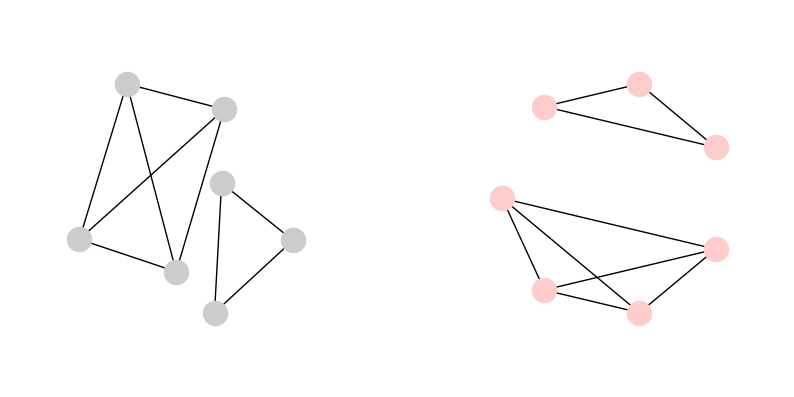

In [22]:
fig = plt.figure(figsize=(10,5), dpi=100)

ax1 = fig.add_subplot(121)
nx.draw_networkx_nodes(G, pos1, ax=ax1, node_color='#cccccc')
nx.draw_networkx_edges(G, pos1, ax=ax1)
ax1.axis('off')
ax1.margins(0.25)

ax2 = fig.add_subplot(122)
nx.draw_networkx_nodes(G, pos2, ax=ax2, node_color='#ffcccc')
nx.draw_networkx_edges(G, pos2, ax=ax2)
ax2.axis('off')
ax2.margins(0.25)

plt.show()

### Stem and Leaf Plots

This is a holdover from the days of mainframes and line printers, but just in case
you want to dabble in this Voodoo, here's a function that'll work for most occasions,
including when you've got negative and fractional values. You can specify the stem unit
(default=10) and the leaf unit is the stem unit divided by 10.

In [23]:
import sys
def stemAndLeaf(data, stemunit=1.0):
    d = []
    stems = []
    leafs = []
    signs = []
    leafunit = stemunit / 10.0
    for datum in sorted(data):
        sign = datum / abs(datum) if datum != 0 else 1
        signs.append(sign)

        stem, leaf = divmod(datum, sign*stemunit)
        stem = stem * sign
        leaf = leaf * sign
        stems.append(int(stem))
        leafs.append(int(leaf/leafunit))
   
    print('-----------------------------------------------')
    # Iterate over all the remaining stems and leafs
    for s in range(min(stems),max(stems)+1):
        if s == 0:
            # Deal with "negative" zero
            ll = [leafs[i] for i in range(len(stems)) if stems[i]==s and signs[i]<0.0]
            if len(ll) > 0:
                sys.stdout.write('      -0 : '.format(s))
                for l in ll:
                    sys.stdout.write('{:d}'.format(l))
                print()
            # Deal with "positive" zero
            ll = [leafs[i] for i in range(len(stems)) if stems[i]==s and signs[i]>0.0]
            if len(ll) > 0:
                sys.stdout.write('      +0 : '.format(s))
                for l in ll:
                    sys.stdout.write('{:d}'.format(l))
                print()
        else:
            ll = [leafs[i] for i in range(len(stems)) if stems[i]==s]
            sys.stdout.write('{:8d} : '.format(s))
            # any other stem value
            for l in ll:
                sys.stdout.write('{:d}'.format(l))
            print()
        
    # Add key to output
    print('''-----------------------------------------------
Key:
Stem unit: {:f}
Leaf unit: {:f}
'''.format(stemunit,leafunit))

In [24]:
# Example 1: Positive integers
ex1 = np.random.randint(1,100,100)
print(np.sort(ex1))
stemAndLeaf(ex1, 10)

[ 1  1  4  5  5  5  6  8  9 10 12 14 14 16 17 19 21 22 24 25 26 28 30 30
 30 30 31 31 31 33 34 38 38 39 41 43 43 44 44 45 46 46 48 48 50 50 52 53
 54 54 54 55 56 56 56 56 56 58 59 59 59 59 60 60 61 62 62 63 65 66 68 69
 70 70 71 72 73 74 74 75 75 80 81 81 82 83 83 83 85 85 87 88 92 93 94 94
 94 97 98 99]
-----------------------------------------------
      +0 : 114555689
       1 : 0244679
       2 : 124568
       3 : 000011134889
       4 : 1334456688
       5 : 002344456666689999
       6 : 0012235689
       7 : 001234455
       8 : 01123335578
       9 : 23444789
-----------------------------------------------
Key:
Stem unit: 10.000000
Leaf unit: 1.000000



In [25]:
# Example 2: Positive and negative integers
ex2 = np.random.randint(-50,50,100)
print(np.sort(ex2))
stemAndLeaf(ex2, 10)

[-50 -49 -47 -47 -46 -43 -42 -41 -39 -39 -38 -37 -37 -35 -35 -34 -32 -29
 -28 -27 -27 -26 -25 -22 -22 -22 -21 -21 -20 -20 -19 -18 -16 -12 -10  -9
  -8  -8  -7  -7  -7  -5  -2  -2   0   0   0   1   1   2   4   4   5   6
   6   7   9   9  10  11  11  14  14  16  17  17  18  19  19  20  20  21
  21  21  22  22  23  24  25  25  26  27  27  28  30  32  33  38  39  42
  42  43  45  45  45  47  48  48  49  49]
-----------------------------------------------
      -5 : 0
      -4 : 9776321
      -3 : 998775542
      -2 : 9877652221100
      -1 : 98620
      -0 : 988777522
      +0 : 00011244566799
       1 : 01144677899
       2 : 001112234556778
       3 : 02389
       4 : 22355578899
-----------------------------------------------
Key:
Stem unit: 10.000000
Leaf unit: 1.000000



In [26]:
# Example 3: positive fractional values
ex3 = np.abs(np.random.randn(50)) * 10.0
print(np.sort(ex3))
stemAndLeaf(ex3)

[ 0.31874657  0.40942566  0.75856649  0.99184227  1.65896116  1.74767797
  1.78220512  1.89098213  2.30998625  2.42915211  2.98186391  3.09307845
  3.10535738  3.42736898  3.64291229  4.76023581  4.88905787  5.1698146
  6.48968618  7.01627185  7.31432231  7.59297229  7.77936429  9.17322223
  9.30435553  9.5732972   9.60960723  9.90391693 10.05660149 10.44293787
 11.16290215 11.35281696 11.87172899 12.122748   12.61274604 13.06583741
 13.30256866 13.73208532 14.12880241 14.54508568 15.36520683 15.4653825
 16.32386899 16.32981869 17.44565386 19.25192952 22.21977148 23.5293685
 25.24891081 27.31332146]
-----------------------------------------------
      +0 : 3479
       1 : 6778
       2 : 349
       3 : 0146
       4 : 78
       5 : 1
       6 : 4
       7 : 0357
       8 : 
       9 : 13569
      10 : 04
      11 : 138
      12 : 16
      13 : 037
      14 : 15
      15 : 34
      16 : 33
      17 : 4
      18 : 
      19 : 2
      20 : 
      21 : 
      22 : 2
      23 : 5
      24 

In [27]:
# Example 4: positive and negative fractional values
ex4 = np.random.randn(25) * 50.0
print(np.sort(ex4))
stemAndLeaf(ex4,10)

[-88.35191733 -71.77648026 -56.40731739 -53.23207307 -40.70771363
 -34.87930805 -34.03729981 -23.82635409 -19.40571605   8.1773557
   8.78557263  11.82766951  12.97421948  13.09210915  23.78574161
  31.00032611  33.71421537  36.38589803  61.59209517  76.48786343
  76.52486517  83.65692331  90.65556183 111.60666463 130.22951748]
-----------------------------------------------
      -8 : 8
      -7 : 1
      -6 : 
      -5 : 63
      -4 : 0
      -3 : 44
      -2 : 3
      -1 : 9
      +0 : 88
       1 : 123
       2 : 3
       3 : 136
       4 : 
       5 : 
       6 : 1
       7 : 66
       8 : 3
       9 : 0
      10 : 
      11 : 1
      12 : 
      13 : 0
-----------------------------------------------
Key:
Stem unit: 10.000000
Leaf unit: 1.000000



<a name="ex307"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.7 - Stem and Leaf Plot

In [28]:
sl = list(iris['Sepal length'])
stemAndLeaf(sl, 1)

-----------------------------------------------
       4 : 2444555557777777999999
       5 : 0000000000000000000222224444445555555555555777777777777777999
       6 : 000000000000222222222222244444445555555777777777779999
       7 : 0022224577779
-----------------------------------------------
Key:
Stem unit: 1.000000
Leaf unit: 0.100000



### Histograms

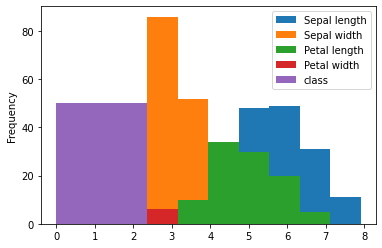

In [29]:
# By default, the hist() method will display histograms for all numeric attributes.
iris.plot.hist()
plt.show()

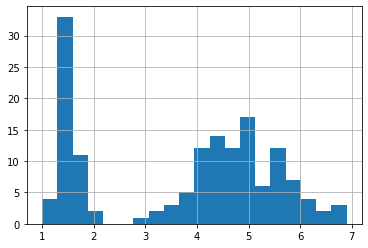

In [30]:
# You can run this on a single attribute too
iris['Petal length'].hist(bins=20)
plt.show()

<a name="ex308"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.8 - Histograms

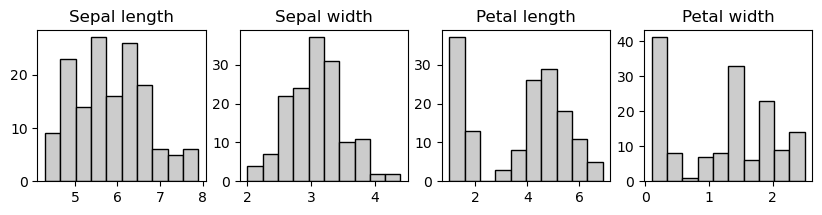

In [31]:
fig = plt.figure(figsize=(10,2), dpi=100)
a = fig.subplots(1,4)
for idx,ax in enumerate(a):
    ax.hist(iris[iris_obj.feature_names[idx]], bins=10, color='#cccccc', ec='black')
    ax.set_title(iris_obj.feature_names[idx])
plt.show()

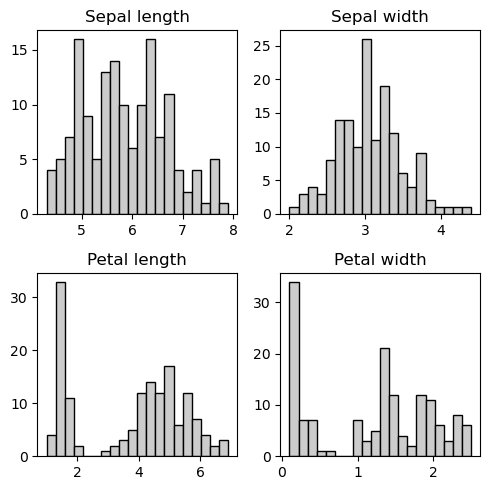

In [32]:
# Same thing, but with 20 bins instead of 10
fig = plt.figure(figsize=(5,5), dpi=100)
a = fig.subplots(2,2) # 2-by-2 layout
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(iris[iris_obj.feature_names[idx]], bins=20, color='#cccccc', ec='black')
    ax.set_title(iris_obj.feature_names[idx])
plt.tight_layout() # clean up the layout
plt.show()

### Heatmap

Pyplot calls this a 2-dimensional histogram.

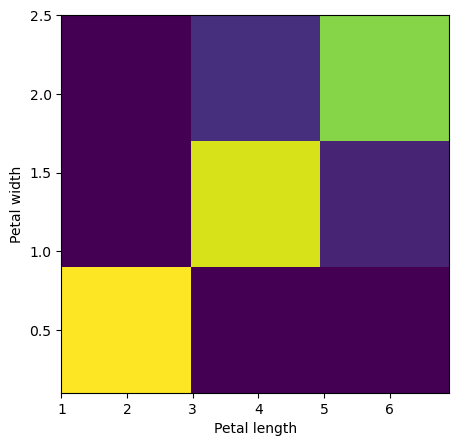

In [33]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.hist2d(iris['Petal length'], iris['Petal width'], bins=3)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

<a name="ex309"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.9 - 3D Histograms

This example generates a 3D histogram, similar to the one in the book.

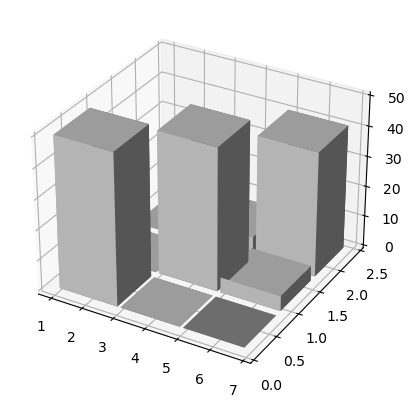

In [34]:
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
x, y = iris['Petal length'], iris['Petal width']
nbins = 3
hist, xedges, yedges = np.histogram2d(x, y, bins=nbins)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = (max(xedges) - min(xedges)) / nbins - 0.1
dy = (max(yedges) - min(yedges)) / nbins - 0.1
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='#cccccc')

plt.show()


<a name="ex310"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.10 - Box Plots

[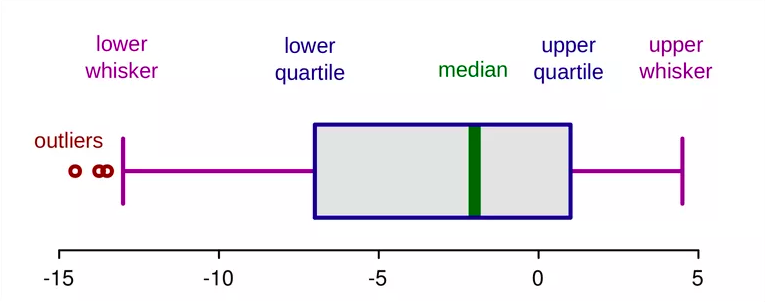](attachment:boxplot.png)

Whiskers sometimes mark the extreme values (min and max)

Alternatively, we can use "Tukey's fences", which define outliers as any points more than $k \times IQR$ away from the median.
* $k=1.5$ is typical.
* We call this a "Tukey Box Plot"


[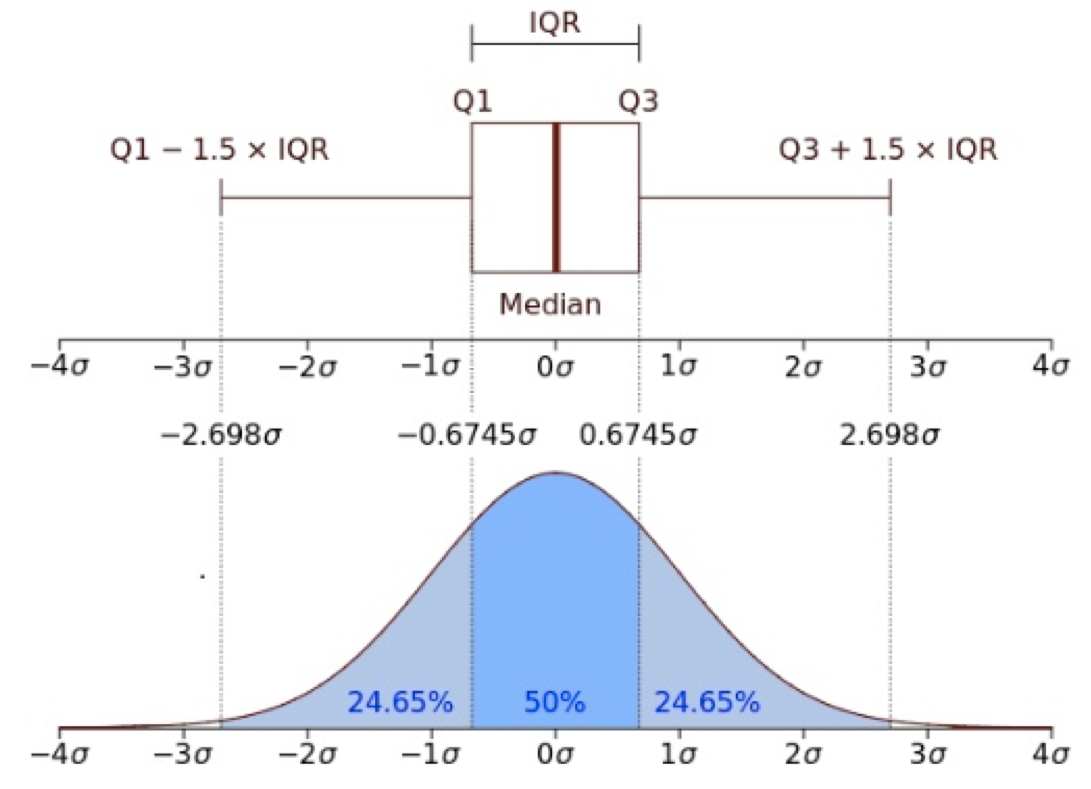](attachment:boxplot-normal.png)

<AxesSubplot:>

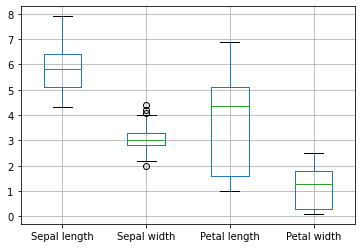

In [35]:
iris.iloc[:,0:4].boxplot()

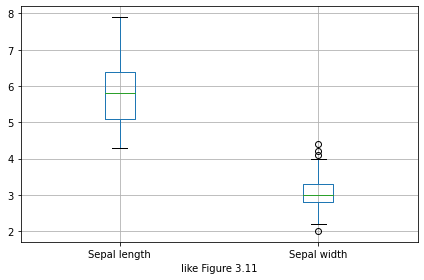

In [36]:
# You can get a crude box plot just by running the boxplot() function on the dataframe
iris.iloc[:,0:2].boxplot()
plt.xlabel('like Figure 3.11')
plt.tight_layout()
plt.show()

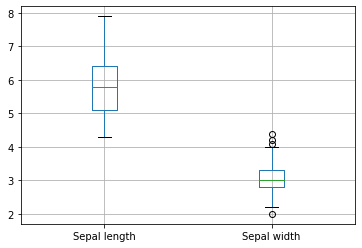

In [37]:
# If we want to limit the variables, we can do so
iris.boxplot(column=['Sepal length', 'Sepal width'])
plt.show()

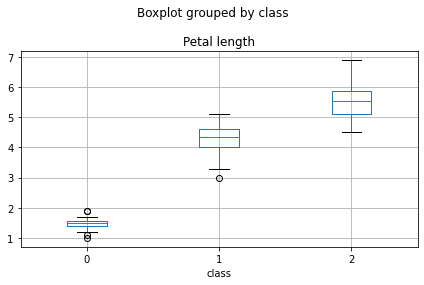

In [38]:
# Single variable by species
iris.boxplot(column='Petal length', by='class')
plt.tight_layout()
plt.show()

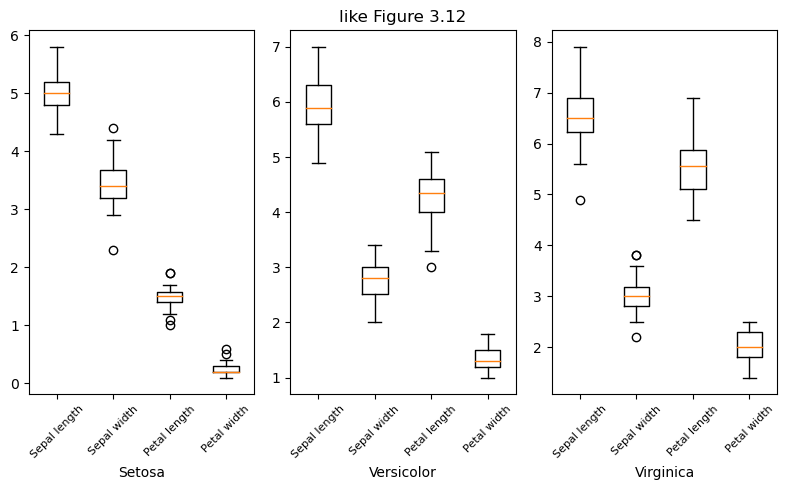

In [39]:
fig = plt.figure(figsize=(8,5), dpi=100)
a = fig.subplots(1,3)
for i,ax in enumerate(a):
    col = iris_obj.feature_names[i]
    df = iris[iris['class']==i]
    ax.boxplot(df.iloc[:,0:4])#, bins=10, color='#cccccc', ec='black')
    ax.set_xlabel(iris_obj.target_names[i])
    ax.set_xticklabels(iris.columns[0:4], size=8, rotation=45) #fontdict={'fontsize': 4})

a[1].set_title('like Figure 3.12')
plt.tight_layout()
plt.show()

<a name="ex311"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.11 - Pie Chart

* Typically used for categorical attributes
* Hard to judge relative size unless differences are few and relatively large
* You should usually prefer histograms


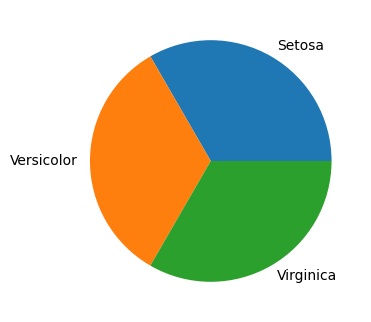

In [40]:
X = iris['class'].value_counts().values
L = iris_obj.target_names
plt.figure(figsize=(6,4), dpi=100)
plt.pie(X, labels=L)
plt.show()

### How to plot an Empirical Cumulative Distribution Function (ECDF)

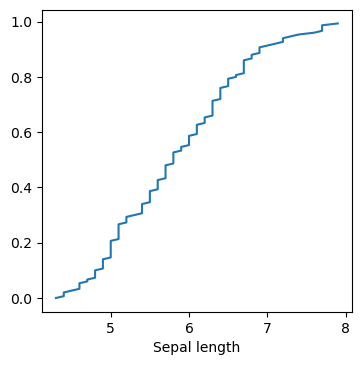

In [41]:
# Start with a sorted list of values
x = np.sort(iris['Sepal length'])

# Calculate cumulative distribution -- a list of monotonically increasing
# values from 0.0 to 1.0
y = np.arange(len(x)) / float(len(x))

fig = plt.figure(figsize=(4,4), dpi=100)
ax2 = fig.add_subplot(111)
ax2.plot(x, y, marker='')
ax2.set_xlabel('Sepal length')
plt.show()

<a name="ex312"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.12 - Plotting an empirical CDF

Generalize for multiple attributes

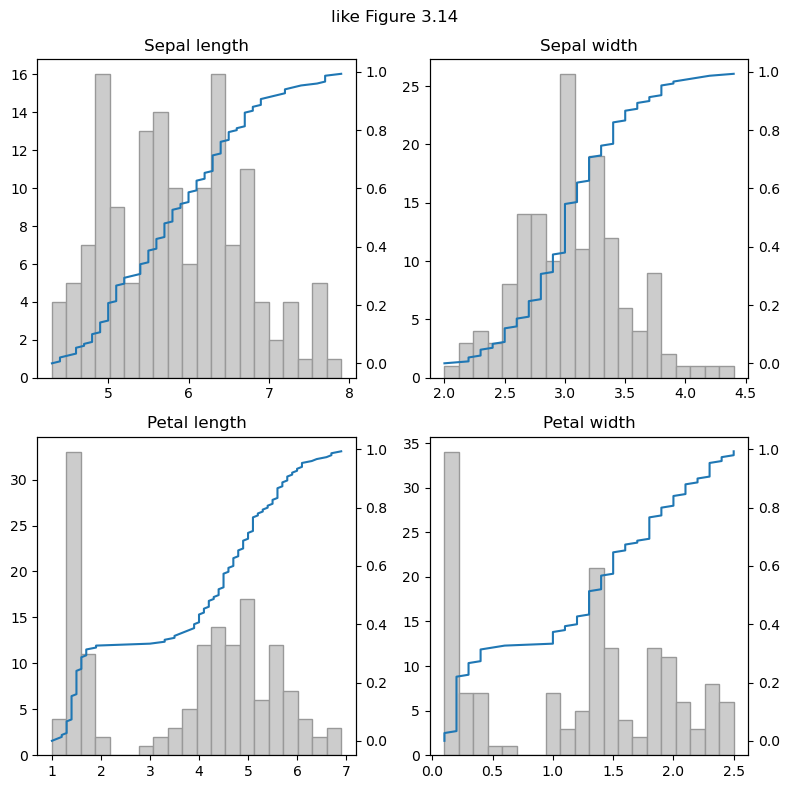

In [42]:
fig = plt.figure(figsize=(8,8), dpi=100)
a = fig.subplots(2,2) # 2 rows by 2 columns
a = a.ravel()
for i,ax in enumerate(a):

    # Start with a sorted list of values (one column at a time)
    x = np.sort(iris.iloc[:,i])

    # Calculate cumulative distribution
    y = np.arange(len(x)) / float(len(x))

    # Plot a histogram too, just for fun
    ax.hist(x, bins=20, color='#cccccc', ec='#999999')

    # Plot the CDF
    ax2 = ax.twinx() # secondary axis
    ax2.plot(x, y, marker='')
    ax2.set_title(iris_obj.feature_names[i])

fig.suptitle('like Figure 3.14')
plt.tight_layout()
plt.show()

### Example 3.12 (cont'd) - Percentile Plot

In [43]:
p = iris.describe(percentiles=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).iloc[4:15,0:4]

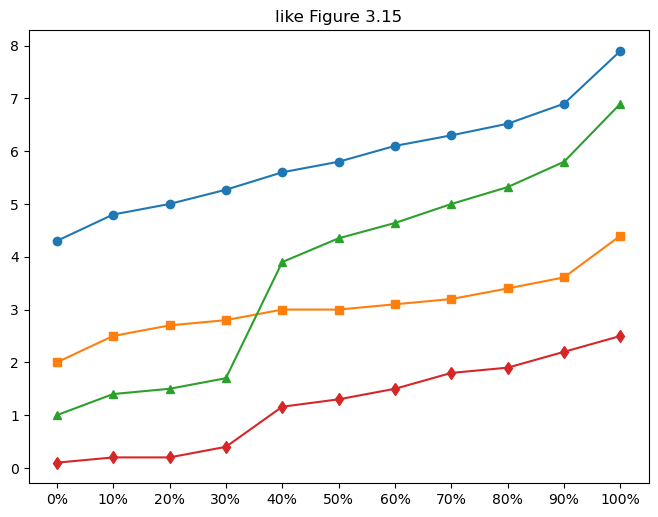

In [44]:
fig = plt.figure(figsize=(8,6), dpi=100)
for col, mk in zip(p.columns, ['o', 's', '^', 'd']):
    plt.plot(p[col], marker=mk)
plt.title('like Figure 3.15')
plt.show()

### Scatter plot

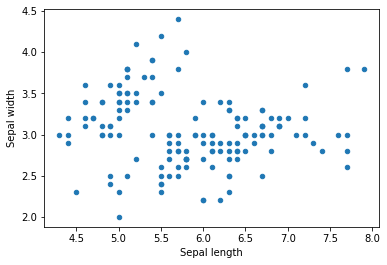

In [45]:
# Simple scatter plot of two variables
iris.plot.scatter('Sepal length', 'Sepal width')
plt.show()

<a name="ex313"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.13 - Scatter plot matrix

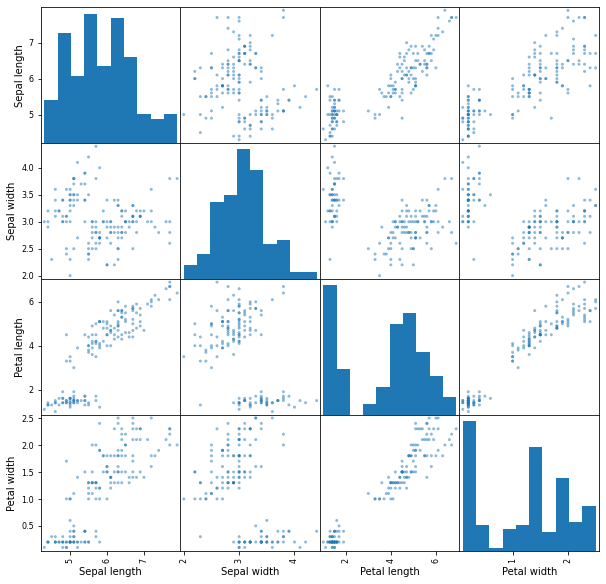

In [46]:
# The easiest way to do this is with Pandas built-in function
pd.plotting.scatter_matrix(iris.iloc[:,0:4], figsize=(10, 10), )
plt.show()

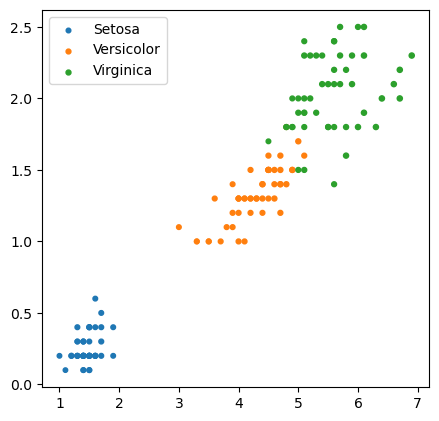

In [47]:
# This method doesn't differentiate among the classes.
# It would be nice to show the species in different colors.
fig = plt.figure(figsize=(5,5), dpi=100)
groups = iris.groupby('class')
ax = fig.subplots()
for name, group in groups:
    ax.scatter(
        x=group['Petal length'],
        y=group['Petal width'],
        marker='o',
        label=iris_obj.target_names[name],
        s=group['Sepal length'].pow(0.5)*5 # vary marker size with the square root of petal length
    )
ax.legend()
plt.show()

For more
ways of doing this, please take a look at
[Four ways to visualize correlation among variables](XTRA%20Four%20ways%20to%20visualize%20correlation%20among%20variables.ipynb).

<a name="ex314"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.14 - Three-dimensional scatter plot

See Figure 3.17

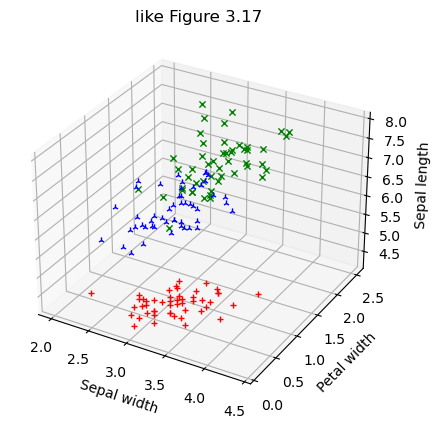

In [48]:
ms = iris['class'].apply(lambda x: ['+', '2', 'x'][x]).values
cs = iris['class'].apply(lambda x: ['r', 'b', 'g'][x]).values

xattr = 'Sepal width'
yattr = 'Petal width'
zattr = 'Sepal length'

xs, ys, zs = iris[xattr], iris[yattr], iris[zattr]

fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
for x, y, z, m, c in zip(xs, ys, zs, ms, cs):
    ax.scatter3D(x, y, z, marker=m, c=c, lw=1.0)

ax.set_xlabel(xattr)
ax.set_ylabel(yattr)
ax.set_zlabel(zattr)

ax.set_title('like Figure 3.17')
plt.show()


<a name="ex315"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.15 - Contour plot

Data source: [Sea surface temperatures for August 2020](https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MYD28M)
(CSV, with 0.5º of resolution)

In [50]:
!wget -nc -P .local_data https://github.com/mihobu/datasets/raw/main/sea-surface-temperatures.csv

--2021-12-14 21:57:42--  https://github.com/mihobu/datasets/raw/main/sea-surface-temperatures.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mihobu/datasets/main/sea-surface-temperatures.csv [following]
--2021-12-14 21:57:43--  https://raw.githubusercontent.com/mihobu/datasets/main/sea-surface-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1720072 (1.6M) [text/plain]
Saving to: '.local_data/sea-surface-temperatures.csv'

sea-surface-tempera 100%[===================>]   1.64M  --.-KB/s    in 0.07s   

2021-12-14 21:57:43 (22.8 MB/s) - '.local_data/sea-surface-temperatures.c

In [52]:
sst = pd.read_csv('.local_data/sea-surface-temperatures.csv', header=None).values
sst.shape

(360, 720)

In [53]:
# min, max (Note: 99999.0 represents land)
sst[sst<99999].min(), sst[sst<99999].max()

(-2.0, 35.0)

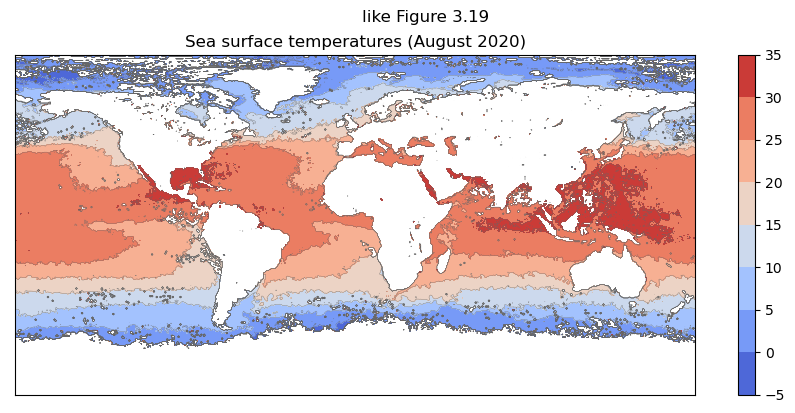

In [54]:
fig = plt.figure(figsize=(11,4.5), dpi=100)
ax = fig.add_subplot(111, aspect=1.0)

c_levels = [-5, 0, 5, 10, 15, 20, 25, 30, 35]

# Fill
contours = ax.contourf(sst, cmap=plt.cm.coolwarm, levels=c_levels, origin='upper')

# draw the contour lines (incl. outlines of land masses)
contour_lines = ax.contour(sst, colors='#666666', levels=c_levels, origin='upper', linewidths=0.25)

# Label contour lines - results can be ugly for complicated contours!
#ax.clabel(contour_lines, fmt='%d', colors='black', fontsize=10, inline=True)

ax.set_yticks([])
ax.set_xticks([])
ax.set_title('Sea surface temperatures (August 2020)')
fig.suptitle('like Figure 3.19')
fig.colorbar(contours)
plt.show()

<a name="ex316"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.16 - Surface plot

See Figure 3.20

<a name="ex317"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.17 - Vector plot

See Figure 3.21

<a name="ex318"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.18 - Contour plot of slices

See Figure 3.22

<a name="ex319"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.19 - Standardized Data Matrix

In [55]:
iris.sort_values('class', ascending=False)

Sepal length  Sepal width  Petal length  Petal width  class
149         5.900        3.000         5.100        1.800      2
111         6.400        2.700         5.300        1.900      2
122         7.700        2.800         6.700        2.000      2
121         5.600        2.800         4.900        2.000      2
120         6.900        3.200         5.700        2.300      2
..            ...          ...           ...          ...    ...
31          5.400        3.400         1.500        0.400      0
30          4.800        3.100         1.600        0.200      0
29          4.700        3.200         1.600        0.200      0
28          5.200        3.400         1.400        0.200      0
0           5.100        3.500         1.400        0.200      0

[150 rows x 5 columns]

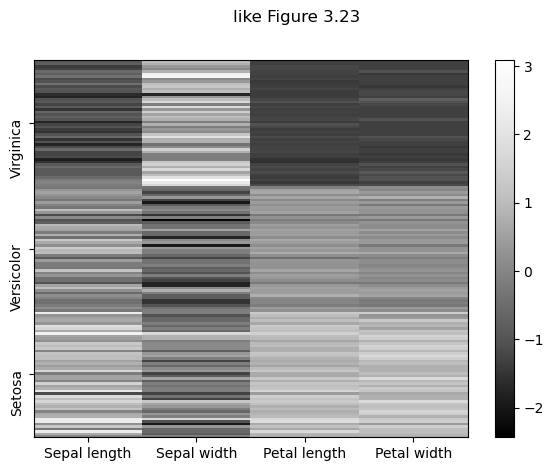

In [56]:
scaler = StandardScaler()
X = iris.sort_values('class', ascending=False).iloc[:,0:4].values
X_scaled = scaler.fit_transform(X)

fig = plt.figure(figsize=(7,5), dpi=100)
ax = fig.add_subplot(111)
heatmap = ax.pcolor(X_scaled, cmap=plt.cm.Greys_r)
ax.set_yticks([25, 75, 125])#, iris_obj.target_names, rotation=90)
ax.set_yticklabels(iris_obj.target_names, rotation=90)
ax.set_xticks([.5, 1.5, 2.5, 3.5])
ax.set_xticklabels(iris_obj.feature_names)
fig.suptitle('like Figure 3.23')
fig.colorbar(heatmap)
plt.show()

<a name="ex320"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Examples 3.20 - correlation matrix

This is also covered in more detail in these notebooks:
* “Four ways to visualize correlation among variables”
* “Cluster Evaluation Using Correlation”

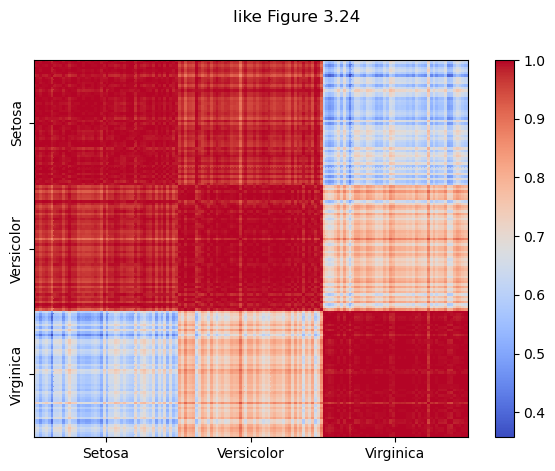

In [57]:
# Correlation matrix
X = iris.sort_values('class', ascending=False).iloc[:,0:4].values
X_corrcoef = np.corrcoef(X)
fig = plt.figure(figsize=(7,5), dpi=100)
ax = fig.add_subplot(111)
heatmap = ax.pcolor(X_corrcoef, cmap=plt.cm.coolwarm)
#plt.pcolormesh(X_corrcoef)
ax.set_yticks([25, 75, 125])
ax.set_yticklabels(iris_obj.target_names, rotation=90, va='center')
ax.set_xticks([25, 75, 125])
ax.set_xticklabels(iris_obj.target_names, rotation=0)
ax.set_ylim(ax.get_ylim()[::-1]) # invert the y-axis
fig.suptitle('like Figure 3.24')
fig.colorbar(heatmap)
plt.show()

<a name="ex321"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.21 - Parallel Coordinates Plot

There are many [colormaps](https://matplotlib.org/users/colormaps.html) to choose from.

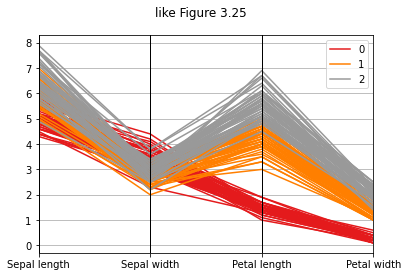

In [58]:
pd.plotting.parallel_coordinates(iris, 'class', colormap='Set1')
plt.suptitle('like Figure 3.25')
plt.show()

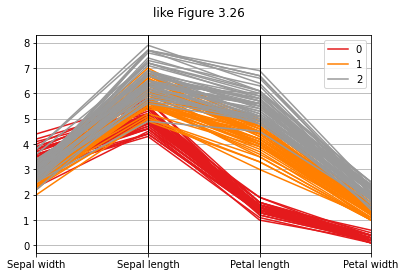

In [59]:
# Same as above, with features reordered
pd.plotting.parallel_coordinates(iris.iloc[:,[1,0,2,3,4]], 'class', colormap='Set1')
plt.suptitle('like Figure 3.26')
plt.show()

<a name="ex322"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Example 3.22 - Star graphs and Chernoff faces

See Figure 3.27

There is not a quick and easy way to generate star graphs (perhaps better known as radar or spider charts)
in PyPlot. There is an
[example](https://matplotlib.org/2.1.1/gallery/api/radar_chart.html),
though, if you are interested.

If you're really into [Chernoff faces](https://www.jstor.org/stable/2284077), there's some Matplotlib code available
[here](https://healthyalgorithms.com/2012/11/12/dataviz-in-python-chernoff-faces-with-matplotlib/).

## Other examples (not in book)

<a name="kdplot"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Kernel density plot

Get an estimate, based on the available data, of the population distribution.
* Histogram + kernel density estimate (KDE)
* Useful for comparing two (or more) distributions
* We’ll see this again in cluster analysis (Gaussian mixture models)

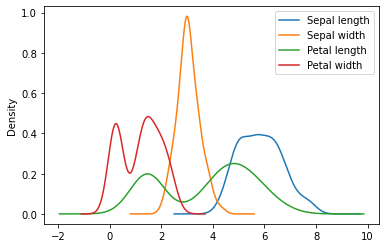

In [60]:
# Quick and dirty
iris.iloc[:,0:4].plot.kde()
plt.show()

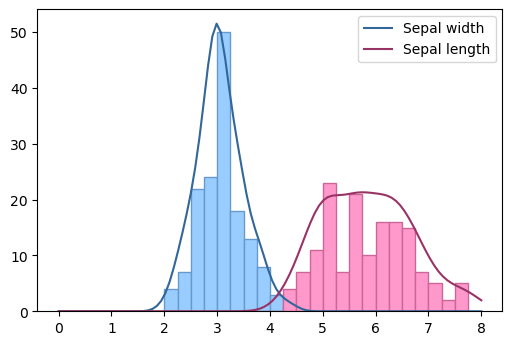

In [61]:
# A more detailed example, in which we plot histograms of
# sepal width and sepal length, with superimposed kernel
# density plots

b = list(np.arange(0,8,0.25)) # set up histogram bins
X = np.linspace(0,8,100)      # generate a range of X values for plotting the KDEs
Y_sepal_width = gaussian_kde(iris['Sepal width'])(X)
Y_sepal_length = gaussian_kde(iris['Sepal length'])(X)

fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.add_subplot(1,1,1)

ax.hist(iris['Sepal width'], fc='#99ccff', ec='#6699cc', bins=b)
ax.hist(iris['Sepal length'], fc='#ff99cc', ec='#cc6699', bins=b)

# KDEs
ax.plot(X, Y_sepal_width * ax.get_ylim()[1], c='#336699', label='Sepal width')
ax.plot(X, Y_sepal_length * ax.get_ylim()[1], c='#993366', label='Sepal length')

ax.legend()
plt.show()

<a name="pareto"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Pareto Chart
Combines
* Bar chart showing frequency of occurrence of categorical data, ordered by frequency
* Empirical cdf

In [62]:
# Let's generate some data
df = pd.DataFrame({
    'Cost Too Much': 375,
    'Defect': 2000,
    'Incorrect Pricing': 1500,
    'Poor Quality Content': 250,
    'Unknown': 350,
    'Wrong Product': 750
}, index=['count']).T.reset_index()
df.columns = ['reason', 'count']
df

reason  count
0         Cost Too Much    375
1                Defect   2000
2     Incorrect Pricing   1500
3  Poor Quality Content    250
4               Unknown    350
5         Wrong Product    750

In [63]:
# Pareto analysis requires that our values are sorted
df.sort_values('count', ascending=False, inplace=True)
df

reason  count
1                Defect   2000
2     Incorrect Pricing   1500
5         Wrong Product    750
0         Cost Too Much    375
4               Unknown    350
3  Poor Quality Content    250

In [64]:
# Compute cumulative percentages
df['cumpct'] = df['count'].cumsum() / df['count'].sum()
df

reason  count  cumpct
1                Defect   2000   0.383
2     Incorrect Pricing   1500   0.670
5         Wrong Product    750   0.813
0         Cost Too Much    375   0.885
4               Unknown    350   0.952
3  Poor Quality Content    250   1.000

In [65]:
vals = ax2.get_yticks()
['{:.0f}%'.format(x*100) for x in vals]

['-20%', '0%', '20%', '40%', '60%', '80%', '100%', '120%']

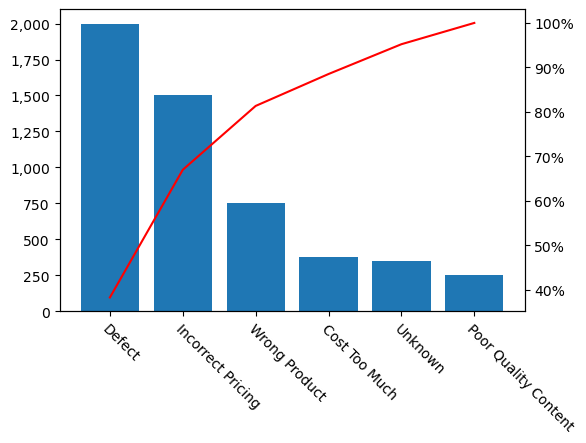

In [66]:
# Plot the data!
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.add_subplot()

ax.bar(range(len(df)), df['count'])
ax.set_xticks(range(len(df)))
ax.set_xticklabels(labels=list(df['reason']), ha='left', rotation=-45, rotation_mode='anchor')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Plot cumulative distribution on secondary axis
ax2 = ax.twinx()
ax2.plot(range(len(df)), df['cumpct'], c='#ff0000')
ax2.ticklabel_format(axis='y')
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:d}%'.format(int(x*100.))))
plt.show()

## Seaborn

[Seaborn](https://seaborn.pydata.org/)
is a Python data visualization library based on
[matplotlib](https://matplotlib.org/). It makes some common tasks
a little easier than they would otherwise be in native matplotlib.

In [67]:
import seaborn as sns

<a name="sbhist"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Histograms and KDE plots

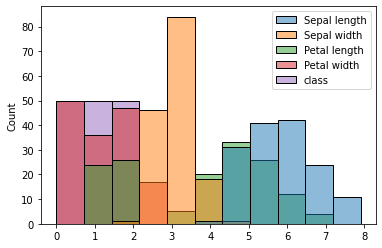

In [68]:
# All attributes
sns.histplot(iris)
plt.show()

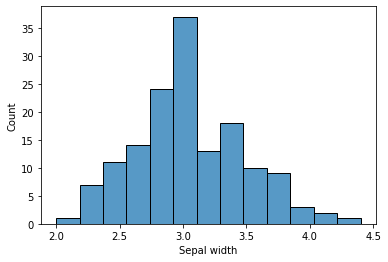

In [69]:
# or just one
sns.histplot(iris['Sepal width'])
plt.show()

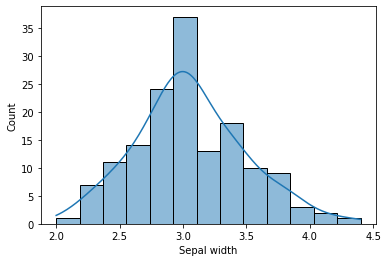

In [70]:
# We can superimpose a KDE plot
sns.histplot(iris['Sepal width'], kde=True)
plt.show()

<AxesSubplot:xlabel='Sepal width', ylabel='Density'>

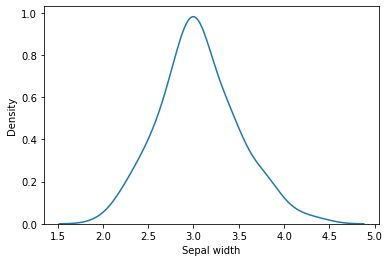

In [71]:
# We JUST the KDE plot
sns.kdeplot(iris['Sepal width'])


In [72]:
# We need a different dataset for this example.
tips = sns.load_dataset("tips")
tips.sample(5)

total_bill   tip     sex smoker   day    time  size
219      30.140 3.090  Female    Yes   Sat  Dinner     4
50       12.540 2.500    Male     No   Sun  Dinner     2
184      40.550 3.000    Male    Yes   Sun  Dinner     2
157      25.000 3.750  Female     No   Sun  Dinner     4
191      19.810 4.190  Female    Yes  Thur   Lunch     2

<a name="sbphist"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Pareto Histogram

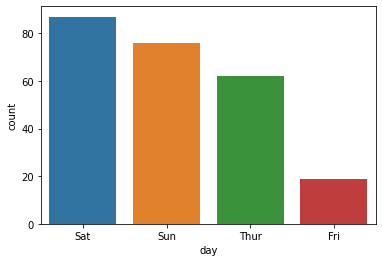

In [73]:
# Get frequencies of each value of 'day'. We'll use this to order the categories in the chart.
c = tips['day'].value_counts()
sns.countplot(data=tips, x='day', order=c.index)
plt.show()

<a name="sbbox"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Box Plots

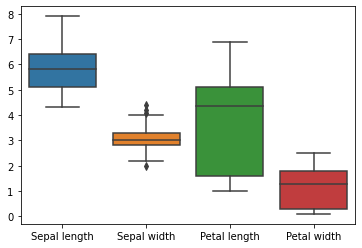

In [74]:
# We can look at the distributions of each variable.
sns.boxplot(data=iris.iloc[:,0:4])
plt.show()

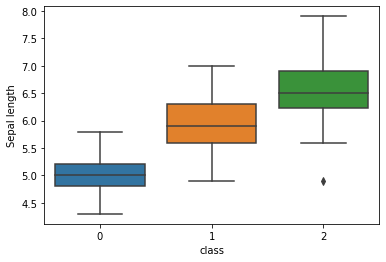

In [75]:
# Let's look at a single variable by species.
sns.boxplot(x=iris["class"], y=iris["Sepal length"] )
plt.show()

For this and other examples, please visit the [Python Graph Gallery](https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/).

<a name="sbviolin"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Violin Plot

Violin plots can reveal aspects of a distribution that box plots do not.

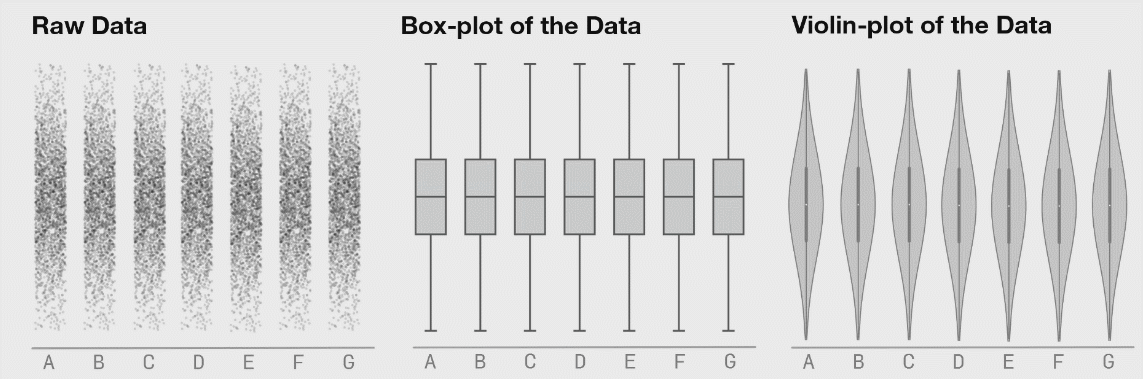

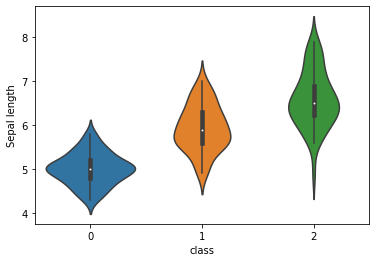

In [76]:
# Let's look at a single variable by species.
sns.violinplot( x=iris["class"], y=iris["Sepal length"] )
plt.show()

<a name="sbscatter"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Scatter Plot

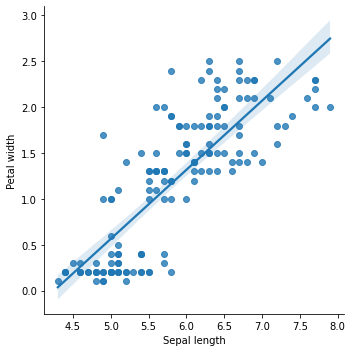

In [77]:
# plot two variables, with each species in a different color
sns.lmplot(data=iris, x="Sepal length", y="Petal width", fit_reg=True)#, hue='class')
plt.show()

<a name="sbspmatrix"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Scatter Plot Matrix

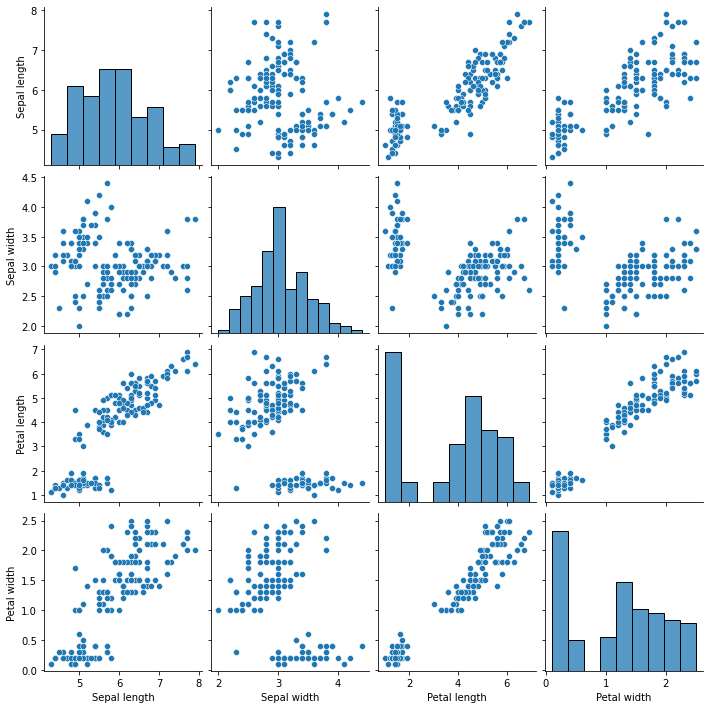

In [78]:
sns.pairplot(iris.iloc[:,0:4], kind="scatter")
plt.show()

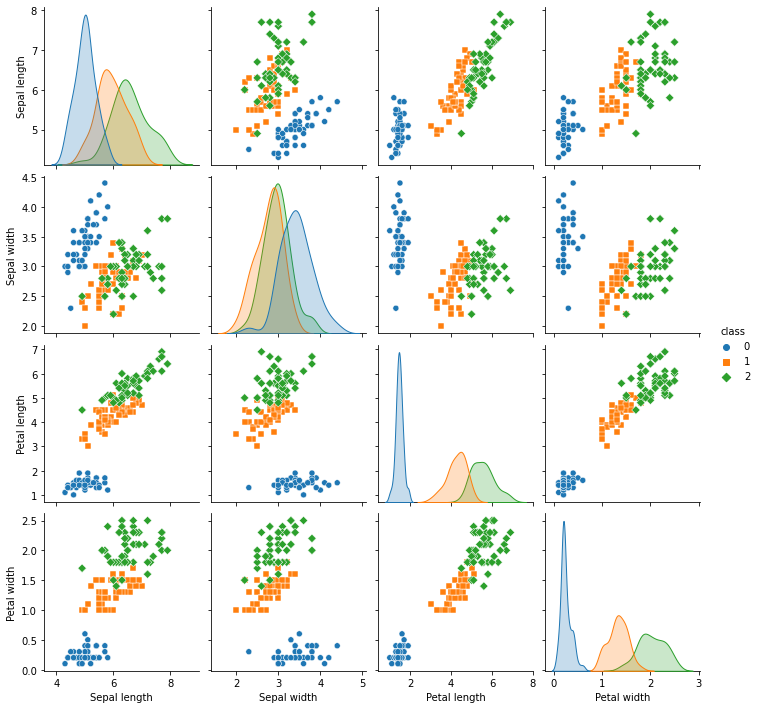

In [79]:
# Vary colors and markers by class; KDE plots instead of single histogram
p = sns.pairplot(iris, kind="scatter", hue="class", markers=["o", "s", "D"], palette="tab10")


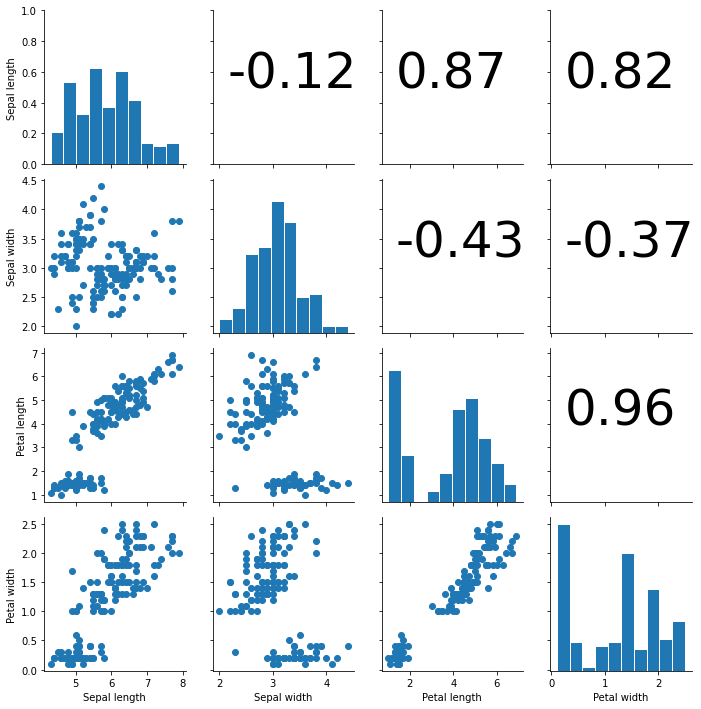

In [80]:
# add correlation coefficients
import scipy as sp
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy=(.1, .5), xycoords=ax.transAxes, size=50)

g = sns.PairGrid(iris.iloc[:,0:4])
g = g.map_lower(plt.scatter)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corrfunc)

<a name="sbmargin"></a><div align="right">[<a href="#contents">Table of Contents</a>]</div>

### Marginal Plot

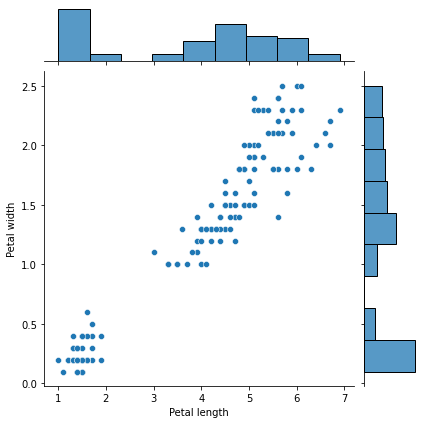

In [81]:
# same basic idea, but show the distribution histograms in the margins.
# Good for focusing on relationship between two features, but you can't distinguish classes this way.
sns.jointplot(data=iris, x='Petal length', y='Petal width', kind='scatter')
plt.show()